In [28]:
import requests
import json
import pandas as pd
%matplotlib inline

In [29]:
cache_fname="worldbankdata.txt"
beginning_year=1960
ending_year=2018
indicator="SH.STA.ACSN"
source=57
# Set parameters

In [30]:
try:
    cache_file = open(cache_fname, 'r')
    cache_contents = cache_file.read()
    raw_data = json.loads(cache_contents)
    cache_file.close()
    #Implement a caching layer
except:
    raw_data = []
    uni_url = 'https://api.worldbank.org/v2/en/countries/all/indicators/'
    base_url = uni_url+indicator
    page_response = requests.get(base_url, params={'format': "JSON","source":source,"date":str(beginning_year)+":"+str(ending_year),"per_page":1000})
    #Note: per_page parameter could be adjusted according to number of records
    page_num = json.loads(page_response.text)[0]["pages"]
    #Get number of pages

    for i in range(1,page_num+1):
        page_response = requests.get(base_url, params={'format': "JSON","source":source,"date":str(beginning_year)+":"+str(ending_year),"per_page":1000,"page":i})
        page_content = json.loads(page_response.text)[1]
        raw_data.extend(page_content)
    #Retrieve data from website page by page and combine them into a list

    cache_file = open(cache_fname, 'w')
    cache_file.write(json.dumps(raw_data))
    cache_file.close()
    #Cache data into txt file

In [31]:
country_index={}
for i in raw_data:
    if i["country"]["value"] in country_index:
        country_index[i["country"]["value"]].append(i["value"])
    else:
        country_index[i["country"]["value"]]=[i["value"]]
#Format data into a dictionary where country or group name is the key and the improved sanitation facilities index from ending year to beginning year is the value
for i in country_index:
    country_index[i]=country_index[i][::-1]
#Reverse the value list to be from beginning year to ending year

In [32]:
High_Income=country_index["High income"]
Upper_Middle_Income=country_index["Upper middle income"]
Lower_Middle_Income=country_index["Lower middle income"]
Low_Income=country_index["Low income"]
World=country_index["World"]
#Extract index from world and different income levels
Year=list(range(beginning_year,ending_year))
income_df = pd.DataFrame({'High Imcome':High_Income,"Upper Middle Income":Upper_Middle_Income,"Lower Middle Income":Lower_Middle_Income,"Low Income":Low_Income,"World":World,"Year":Year})
#Construct index across world and different income levels into a pandas dataframe with year as the index
income_df.dropna(thresh=4,inplace=True)
#Keep only the rows with at least 4 non-NaN values.

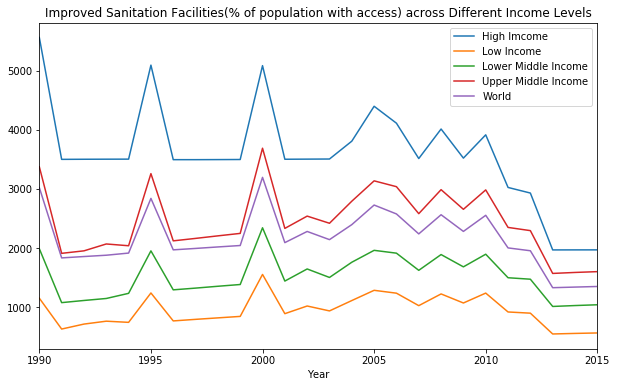

In [33]:
income_df.plot(x="Year",figsize=(10, 6),title="Improved Sanitation Facilities(% of population with access) across Different Income Levels")
#Data visualization